<a href="https://colab.research.google.com/github/akashj30/Deep-Learing/blob/main/Regression_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Regression with Keras

In [1]:
from warnings import filterwarnings
filterwarnings('ignore')

Step 1 : Read the Dataset

In [2]:
import pandas as pd
url ="https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/PowerPlant.csv"
df = pd.read_csv(url)
df.head()

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43


### Step 2 : Perform Basic Data Quality check

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9568 entries, 0 to 9567
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   AT      9568 non-null   float64
 1   V       9568 non-null   float64
 2   AP      9568 non-null   float64
 3   RH      9568 non-null   float64
 4   PE      9568 non-null   float64
dtypes: float64(5)
memory usage: 373.9 KB


In [4]:
df.isna().sum()

AT    0
V     0
AP    0
RH    0
PE    0
dtype: int64

In [5]:
df.duplicated().sum()

41

In [6]:
df.duplicated().sum()/len(df)

0.004285117056856187

In [8]:
df = df.drop_duplicates(keep='first')
df

,AT,V,AP,RH,PE
0,8.34,40.77,1010.84,90.01,480.48
1,23.64,58.49,1011.40,74.20,445.75
2,29.74,56.90,1007.15,41.91,438.76
3,19.07,49.69,1007.22,76.79,453.09
4,11.80,40.66,1017.13,97.20,464.43
...,...,...,...,...,...
9563,15.12,48.92,1011.80,72.93,462.59
9564,33.41,77.95,1010.30,59.72,432.90
9565,15.99,43.34,1014.20,78.66,465.96
9566,17.65,59.87,1018.58,94.65,450.93


### Seperate X and Y (PE)


In [9]:
X = df.drop(columns=['PE'])
Y = df['PE']

In [10]:
X.head()

,AT,V,AP,RH
0,8.34,40.77,1010.84,90.01
1,23.64,58.49,1011.40,74.20
2,29.74,56.90,1007.15,41.91
3,19.07,49.69,1007.22,76.79
4,11.80,40.66,1017.13,97.20


In [11]:
Y.head()

0    480.48
1    445.75
2    438.76
3    453.09
4    464.43
Name: PE, dtype: float64

### Step 4: Preprocess X using pipeline


In [12]:
X.dtypes

AT    float64
V     float64
AP    float64
RH    float64
dtype: object

In [13]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

In [14]:
num_pipe = Pipeline(steps=[('impute',SimpleImputer(strategy='mean')),
                           ('scale',StandardScaler())]).set_output(transform='pandas')

In [15]:
X_pre = num_pipe.fit_transform(X)
X_pre.head()

,AT,V,AP,RH
0,-1.520448,-1.066041,-0.403535,1.141599
1,0.534897,0.330813,-0.309262,0.059223
2,1.354348,0.205475,-1.024725,-2.151400
3,-0.079020,-0.362884,-1.012941,0.236538
4,-1.055645,-1.074713,0.655349,1.633837


### Apply Train Test split


In [16]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest = train_test_split(X_pre,Y,test_size=0.2,random_state=42)

In [17]:
xtrain.head()

,AT,V,AP,RH
5703,-0.152905,0.324507,0.089713,1.817999
7322,-1.497611,-1.153542,0.323712,0.908830
9105,-0.885038,-0.954892,0.293410,0.988245
6436,1.398679,1.223949,-0.479290,-1.082031
6790,-0.824586,-0.942279,0.796758,1.506499


In [18]:
ytrain.head()

5703    446.68
7322    483.54
9105    461.71
6436    437.38
6790    463.71
Name: PE, dtype: float64

In [19]:
xtest.head()

,AT,V,AP,RH
1087,1.827212,1.120683,-0.125767,-1.414069
6319,-1.501641,-1.244984,0.044260,-0.467246
8052,-1.465370,-1.418408,0.399466,-1.082031
9524,0.150695,0.648495,0.731104,-0.002393
4463,-0.036032,1.128565,-0.361449,1.586599


In [20]:
ytest.head()

1087    429.38
6319    485.29
8052    480.40
9524    452.30
4463    446.47
Name: PE, dtype: float64

In [21]:
xtrain.shape

(7621, 4)

In [23]:
xtest.shape

(1906, 4)

In [24]:
xtrain.shape[1]

4

### Step 5: Build the neural network
Hidden Layer use relu as activation function

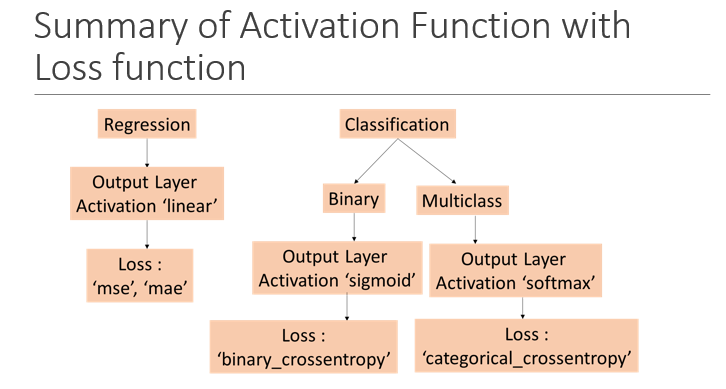

In [25]:
from keras.models import Sequential
from keras.layers import Dense,Input

In [26]:
# Intialize the model
model = Sequential()

# Add input layer
model.add(Input(shape=(xtrain.shape[1],)))

# Add Dense Hidden Layer 1
model.add(Dense(16,activation='relu'))

# Add Dense Hidden Layer 2
model.add(Dense(8,activation='relu'))

# Add Dense Output Layer
model.add(Dense(1,activation='linear'))

In [27]:
# Compile the model
model.compile(loss="mse",metrics=["mae"],optimizer="adam")

In [28]:
hist = model.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=60)

Epoch 1/60
239/239 [==============================] - 4s 6ms/step - loss: 204675.6406 - mae: 452.1228 - val_loss: 198762.9062 - val_mae: 445.6055
Epoch 2/60
239/239 [==============================] - 1s 3ms/step - loss: 170310.2031 - mae: 411.4778 - val_loss: 126297.3828 - val_mae: 353.8784
Epoch 3/60
239/239 [==============================] - 1s 4ms/step - loss: 77132.0547 - mae: 263.7195 - val_loss: 37160.4102 - val_mae: 170.7502
Epoch 4/60
239/239 [==============================] - 1s 4ms/step - loss: 23301.5137 - mae: 129.0563 - val_loss: 15553.4326 - val_mae: 104.7485
Epoch 5/60
239/239 [==============================] - 1s 4ms/step - loss: 13283.7012 - mae: 97.0735 - val_loss: 10729.3613 - val_mae: 87.0814
Epoch 6/60
239/239 [==============================] - 1s 4ms/step - loss: 9156.8320 - mae: 80.6403 - val_loss: 7107.1831 - val_mae: 70.8801
Epoch 7/60
239/239 [==============================] - 1s 4ms/step - loss: 5841.1138 - mae: 64.3641 - val_loss: 4281.9316 - val_mae: 54.720

In [29]:
hist.history["loss"]

[204675.640625,
 170310.203125,
 77132.0546875,
 23301.513671875,
 13283.701171875,
 9156.83203125,
 5841.11376953125,
 3441.9169921875,
 1996.623779296875,
 1200.6119384765625,
 773.80224609375,
 534.6895141601562,
 381.42401123046875,
 275.96087646484375,
 203.6947479248047,
 153.07069396972656,
 117.64283752441406,
 92.73829650878906,
 75.3048324584961,
 62.299163818359375,
 52.75705337524414,
 45.7224235534668,
 40.02763748168945,
 35.74407196044922,
 32.5589485168457,
 30.155357360839844,
 28.283824920654297,
 26.56453514099121,
 25.503616333007812,
 24.532087326049805,
 23.884870529174805,
 23.298992156982422,
 22.952383041381836,
 22.558042526245117,
 22.44814109802246,
 21.984329223632812,
 21.888078689575195,
 21.598941802978516,
 21.622257232666016,
 21.41989517211914,
 21.488609313964844,
 21.36873435974121,
 21.25827980041504,
 21.114763259887695,
 20.991905212402344,
 21.00295639038086,
 20.90298843383789,
 20.775094985961914,
 20.601449966430664,
 20.713043212890625,
 20.

In [30]:
hist.history["val_loss"]

[198762.90625,
 126297.3828125,
 37160.41015625,
 15553.4326171875,
 10729.361328125,
 7107.18310546875,
 4281.931640625,
 2449.616943359375,
 1434.286865234375,
 890.9862670898438,
 598.5652465820312,
 424.4919128417969,
 303.0462951660156,
 223.2943115234375,
 164.92526245117188,
 125.95633697509766,
 98.2935562133789,
 78.04244232177734,
 64.10917663574219,
 54.17194366455078,
 46.46121597290039,
 40.76165771484375,
 36.09610366821289,
 32.440975189208984,
 30.0207576751709,
 27.960092544555664,
 26.149517059326172,
 24.847963333129883,
 24.198389053344727,
 23.369213104248047,
 23.003360748291016,
 23.15880012512207,
 22.645137786865234,
 21.531389236450195,
 22.237285614013672,
 21.413970947265625,
 21.38192367553711,
 21.228313446044922,
 21.66160774230957,
 21.193862915039062,
 21.215898513793945,
 21.889625549316406,
 21.035993576049805,
 21.34503746032715,
 20.859704971313477,
 20.784379959106445,
 20.34074592590332,
 20.381629943847656,
 20.2836971282959,
 20.032129287719727,

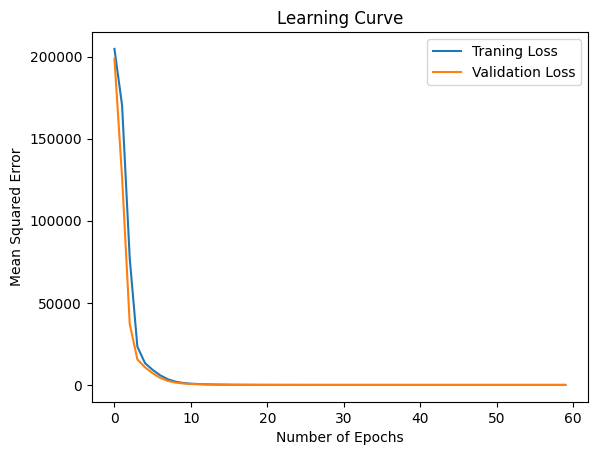

In [35]:
import matplotlib.pyplot as plt
plt.plot(hist.history['loss'],label = 'Traning Loss')
plt.plot(hist.history["val_loss"], label="Validation Loss")
plt.xlabel("Number of Epochs")
plt.ylabel('Mean Squared Error')
plt.title('Learning Curve')
plt.legend()
plt.show()

In [36]:
model.evaluate(xtrain,ytrain)

239/239 [==============================] - 1s 2ms/step - loss: 19.6639 - mae: 3.4753


[19.6639347076416, 3.4752511978149414]

In [37]:
model.evaluate(xtest,ytest)

60/60 [==============================] - 0s 3ms/step - loss: 19.6580 - mae: 3.5110


[19.658010482788086, 3.511038064956665]

### Predict the results for train and test


In [38]:
ypred_train = model.predict(xtrain)
ypred_test = model.predict(xtest)

60/60 [==============================] - 0s 1ms/step


In [39]:
ypred_train[0:5]

array([[451.09546],
       [478.47882],
       [468.64783],
       [431.8183 ],
       [466.72565]], dtype=float32)

In [40]:
ytrain.head()

5703    446.68
7322    483.54
9105    461.71
6436    437.38
6790    463.71
Name: PE, dtype: float64

In [41]:
ypred_test[0:5]

array([[429.86572],
       [481.83026],
       [483.4325 ],
       [449.55463],
       [446.58496]], dtype=float32)

In [42]:
ytest.head()

1087    429.38
6319    485.29
8052    480.40
9524    452.30
4463    446.47
Name: PE, dtype: float64

In [43]:
# R2 score in train
from sklearn.metrics import r2_score
r2_score(ytrain,ypred_train)

0.9315858496090645

In [44]:
# R2 score in test
r2_score(ytest,ypred_test)

0.9348618853307412

### Because I have r2 score > 0.8 for both train and test i can use above model for out of sample prediction

In [45]:
url2="https://raw.githubusercontent.com/utkarshg1/Neural-Net-Datasets/main/test_PowerPlant.csv"
xnew = pd.read_csv(url2)
xnew.head()

,AT,V,AP,RH
0,22.49,58.82,1009.73,85.19
1,28.88,54.89,1007.16,46.60
2,27.89,73.21,1001.32,85.88
3,25.69,62.26,1011.38,74.08
4,12.16,40.81,1025.79,70.97


In [46]:
num_pipe

Pipeline(steps=[('impute', SimpleImputer()), ('scale', StandardScaler())])

In [49]:
xnew_pre = num_pipe.transform(xnew)
xnew_pre.head()

,AT,V,AP,RH
0,0.380410,0.356827,-0.590397,0.811615
1,1.238819,0.047028,-1.023041,-1.830315
2,1.105826,1.491180,-2.006171,0.858853
3,0.810286,0.628000,-0.312629,0.051007
4,-1.007284,-1.062888,2.113209,-0.161908


In [50]:
preds = model.predict(xnew_pre)
preds[0:5]

4/4 [==============================] - 0s 3ms/step


array([[445.27118],
       [439.74408],
       [431.3098 ],
       [439.70673],
       [473.83603]], dtype=float32)

In [53]:
xnew["PowerOutput_pred"]=preds
xnew

,AT,V,AP,RH,PowerOutput,PowerOutput_pred
0,22.49,58.82,1009.73,85.19,445.271179,445.271179
1,28.88,54.89,1007.16,46.60,439.744080,439.744080
2,27.89,73.21,1001.32,85.88,431.309814,431.309814
3,25.69,62.26,1011.38,74.08,439.706726,439.706726
4,12.16,40.81,1025.79,70.97,473.836029,473.836029
...,...,...,...,...,...,...
95,26.35,69.48,1008.45,70.47,436.564117,436.564117
96,11.78,39.96,1011.37,82.95,472.410919,472.410919
97,5.62,41.38,1020.91,86.21,483.867188,483.867188
98,24.96,74.99,1008.25,80.52,436.022034,436.022034


<Axes: xlabel='PowerOutput_pred', ylabel='Count'>

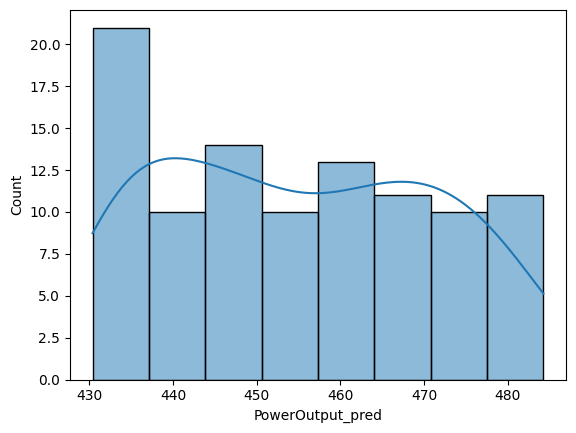

In [54]:
import seaborn as sns
sns.histplot(data=xnew, x="PowerOutput_pred",kde= True)

In [55]:
xnew.to_csv("Result.csv",index = False)